In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = pd.read_csv('Data.csv')
# top20 = df.nlargest(20,['metric_value'])
df = df[df.metric_value > 100]
df = df[df['metric_name'].str.contains('accounts')]
df = df.groupby('metric_name').filter(lambda x: len(x) >= 1000)
count = df['metric_name'].value_counts().head(20) 
print(count)

google.accounts:num_30day_logins                               1577
google.accounts:num_7day_logins                                1577
google.accounts:num_suspended_users                            1577
google.accounts:num_1day_logins                                1577
google.accounts:num_users_2sv_not_enforced                     1577
google.accounts:num_users                                      1577
google.accounts:num_disabled_accounts                          1577
google.accounts:num_users_2sv_not_enrolled                     1577
google.accounts:num_users_2sv_not_enrolled_and_not_enforced    1577
google.accounts:num_authorized_apps                            1542
google.accounts:gplus_photos_used_quota_in_mb                  1490
google.accounts:drive_used_quota_in_mb                         1490
google.accounts:used_quota_in_mb                               1490
google.accounts:gmail_used_quota_in_mb                         1490
google.accounts:num_users_less_secure_apps_acces

In [2]:
df1= df[df.metric_name == 'google.accounts:num_1day_logins']
df1= df1['metric_value']
df30= df[df.metric_name == 'google.accounts:num_30day_logins']
df30= df30['metric_value']

In [3]:

np.cov(df1, df30)[0, 1]

1002630.4139107863

In [4]:
print('Covariance of X and Y: %.2f'%np.cov(df1, df30)[0, 1])
print('Correlation of X and Y: %.2f'%np.corrcoef(df1, df30)[0, 1])

Covariance of X and Y: 1002630.41
Correlation of X and Y: 0.29


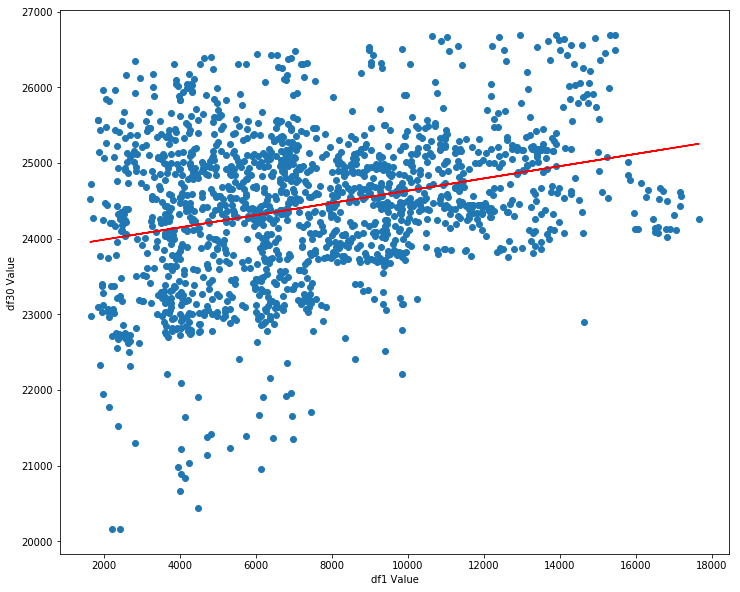

Correlation of df1 and df30: 0.29


In [8]:
m, b = np.polyfit(df1, df30, 1)

plt.figure(figsize=(12,10))
plt.scatter(df1,df30)
plt.xlabel('df1 Value')
plt.ylabel('df30 Value')
plt.plot(df1, m*df1 + b, 'r-')
plt.show()
print('Correlation of df1 and df30: %.2f'%np.corrcoef(df1, df30)[0, 1])